# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

age = data['age']
education_num = data['education-num']
income = data['income']
race =data['race']
hours_per_week = data['hours-per-week']
#features = data.drop('income','workclass', 'martial-status', 'relationship', 'capital-gain', 'capital-loss', 'hours-pr-week', 'native-country', axis = 1)
features = data.drop('income', axis = 1)
features = data.drop('occupation', axis = 1)
features = data.drop('sex', axis = 1)
features = data.drop('race', axis = 1)
features = data.drop('workclass', axis = 1)
features = data.drop('education_level', axis = 1)
features = data.drop('marital-status', axis = 1)
features = data.drop('relationship', axis = 1)
features = data.drop('capital-gain', axis = 1)
features = data.drop('capital-loss', axis = 1)
#features = data.drop('hours-per-week', axis = 1)
features = data.drop('native-country', axis = 1)
#features = data.drop('Unnamed:', axis = 1)
#data.drop('Unnamed:0', axis = 1)
#mapping = {'<=50K': 0, '>50K': 1}
#data=data.replace({'income': mapping})
#data.to_csv('test.csv')
# Success - Display the first record
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


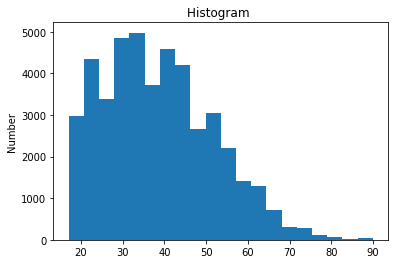

In [2]:
#some checks
hist_data = (data['age'])
plt.hist(hist_data, bins = 20)
plt.title('Histogram ')
#plt.xlabel(col)
plt.ylabel('Number')

#number_of_individuals = len( data[(hours_per_week>40.0)])
#print (number_of_individuals)

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


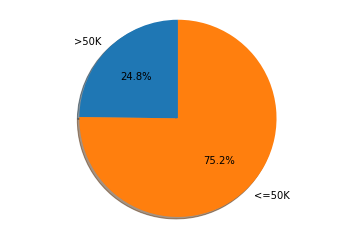

In [3]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[(income == '>50K')])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[(income == '<=50K')])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = np.divide(n_greater_50k,float(n_records))*100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)


labels = '>50K', '<=50K'
sizes = [n_greater_50k, n_at_most_50k]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

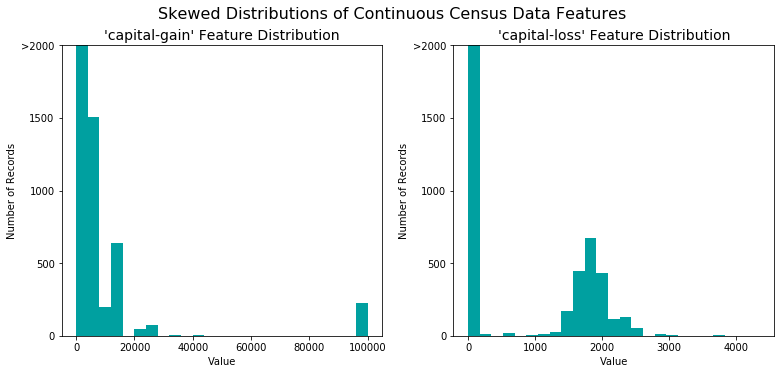

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

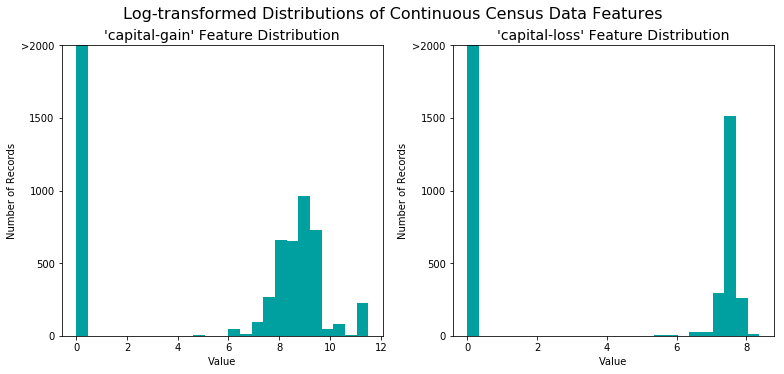

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:

# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
mapping = {'<=50K': 0, '>50K': 1}
data=data.replace({'income': mapping})
income = data['income']

#test of conversion
print ('data after conversion',income[1:10])

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded

('data after conversion', 1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64)
103 total features after one-hot encoding.


In [7]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [8]:
# Import train_test_split
warnings.filterwarnings("ignore")
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [9]:
# TODO: Calculate accuracy
accuracy = greater_percent/100
recall = 1
beta = 0.5

# TODO: Calculate F-score using the formula above for beta = 0.5

fscore = ((1+beta**2)*accuracy*recall)/(beta**2*accuracy+recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**List three of the supervised learning models above that are appropriate for this problem that you will test on the census data**

For this problem it is suggested to applied following three models:
1.Random Forest (RF)
2.K-Nearest Neighbors (KNN)
3.Support Vector Machines (SVM)


**Describe one real-world application in industry where the model can be applied. (You may togneed to do research for this — give references!)**

RF: 
Random forest is an ensemble learning method for classification, regression, or other tasks, which takes a subset of observations and a subset of variables to build a decision trees. The decision trees are then combined together to get more accurate and stable prediction. The Random Forests algorithm is usually applied in medical research, biological studies and bioinformatics: http://repository.cmu.edu/cgi/viewcontent.cgi?article=2067&context=compsci ; Díaz-Uriarte: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-3 . Random forest was also applied in economical research where Euro area GDP forecasting was also investigated: http://ec.europa.eu/eurostat/documents/4187653/5781955/EWP-2011-002-EN.PDF/56bf3a24-e037-4e01-afdd-d48dd359dd27

KNN:
The algorithm stores all training samples and by analyzing a certain number (K) of the nearest neighbors classifies new cases based on a similarity measure (distance functions: Euclidean, Manhattan).
k-NN is often used in search applications where it is necessary to look for similarities (by creating a vector representation of the items, and then compare the vectors using an appropriate distance metric). In Quora: https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm it was mentioned that regarding classification algorithm is used by Herta Security company: http://www.hertasecurity.com/en/products/bioaccess  (k-NN is used to identify a person by compare the face to incorporated watch list). In research article http://www.ijera.com/papers/Vol3_issue5/DI35605610.pdf k-NN method is recomended for economic forecasting (financial distress prediction). Nevertheless, the discussed classification method was applied also in analyzing Alzheimer’s disease https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3703613/ 

SVM:
The objective of the Support Vector Machine algorithm is to find the best splitting boundary between data. Data is separated by hyperplane that contains the widest margin between support vectors. The article: http://folk.ntnu.no/skoge/prost/proceedings/npc07/TKK/TKK09.pdf  presents research study where SVM is used for detecting measurement faults.
Regarding algorithm is also used often in economic forecasting (like KNN). Following article: http://www.atlantis-press.com/php/download_paper.php?id=20028 presents possibility to predict that whether there exists financial crisis in a company or not.    


**What are the strengths of the model; when does it perform well?**

RF:
Random Forests algorithm is fast and easy to implement, enjoys good prediction properties, is robust to noise and, what matters here, can handle a very large number of input variables without overfitting. 
It performs well (more accurate) when more trees (features to be averaged) are taken to consideration (available). Ability to handle data without preprocessing (data does not need to be rescaled, transformed, or modified). The algorithm is resistant to outliers. Random forests model can be an effective solution as the parameters are mostly discrete and fast response time (prediction) is not a issue.

KNN:
KNN supports incremental training. Algorithm can handle complex numerical functions while still being easy to interpret. It is possible to mark the neighbors, who are used for the final predictions. In addition k-NN is useful if data is difficult/expensive to collect. The scaling process can reveal which variables are unimportant for making predictions and thus can be thrown out. k-NN does better when one focusses on finding the similarity between different observations, and the dataset is small.

SVM:
By maximizing the margins, the model minimizes misclassification so the SVM algorithm provide robust solution.  Discussed method allows by use of kernels separate complex relationships. It also works very well with high dimensional data. SVM is also very fast at classifying new data ( there is no need to go through training data for new classifications). Algorithm can also work for a mixture of categorical and numerical data. Algorithm performs well if  knowledge about invariances of the problem is incorporated (accuracy increases). The classication speed can be increased by reducing the complexity of the decision function representation. http://www.kyb.tuebingen.mpg.de/fileadmin/user_upload/files/publications/NIPS-1996-Burgess.pdf 

**What are the weaknesses of the model; when does it perform poorly?**

RF:
The biggest weakness of this model is that due to large number of tress it can be slow for real-time prediction. It also suffers from overfitting and does not handle data with a lot of noise well. 

KNN:
Model requires all provided training data to make predictions. This implies that algorithm can be very slow for large datasets and can require a lot of space. In addition finding correct scaling factors can be tedious and computationally expensive when there are millions of variables. On the other hand, KNN might not perform well while the dimentionality is high. https://docs.microsoft.com/en-us/azure/machine-learning/machine-learning-algorithm-choice 

SVM:
The main disadvantage of the SVM algorithm is that it has several key parameters that need to be set correctly to achieve the best classification results for any given problem. A second limitation is connected with the speed and size, both in training and testing. The model perform poor when the kernel is not chosen correctly. http://www.diw.de/documents/publikationen/73/88369/dp811.pdf 
http://www.svms.org/disadvantages.html 


**What makes this model a good candidate for the problem, given what you know about the data?**

RF:
Random Forest supports the high accuracy and ability to run large data sets therefore the model seems to be a good choice. In addition, random forests are highly flexible and perform implicit feature selection to provide a pretty good indicator of feature importance. In this project, the data has both categorical and numerical values making it the perfect place to apply decision trees and ultimately classification into two categories based on the best attributes can be well taken care of by decision tree.

KNN:
The model can support possibility that the result will be easy to interpret in the next phase of the project 

SVM:
In this project expectation regarding usage SVM can be that algorithm is accurate, support large data set both and allows to work with two categories of data set (like in the project).


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time.time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time() # Get end time
    
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300]) 
    end = time.time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] =accuracy_score(y_train[:300], predictions_train)
    #round(svc.score(X_test, y_test), 4))    
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results



### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

LinearSVC trained on 361 samples.
LinearSVC trained on 3617 samples.
LinearSVC trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


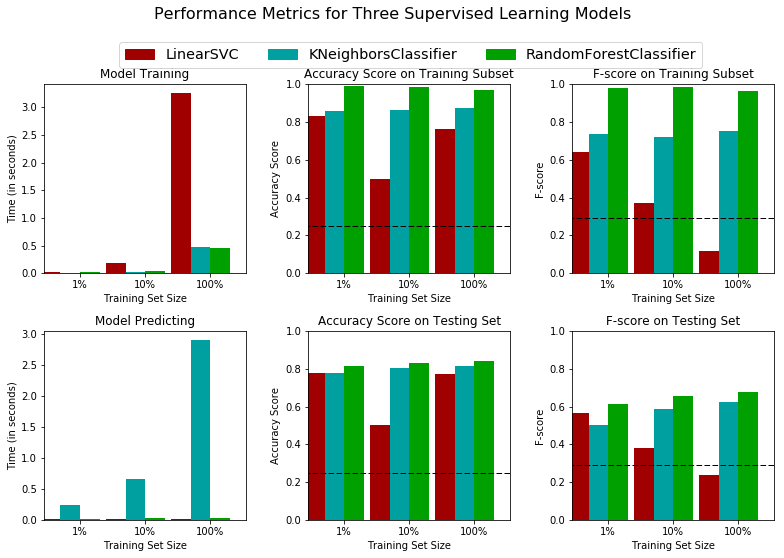

In [11]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.cross_validation import train_test_split
import time
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)

# TODO: Initialize the three models
clf_A = LinearSVC()
clf_B = RandomForestClassifier()
clf_C = KNeighborsClassifier()
#X_train, X_test, y_train, y_test
# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01*len(X_train))
samples_10 = int(0.1*len(X_train))
samples_100 = 1*len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
#print ('prediction time for', results)
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: ** Based on carried out previous investigation it can be announced that the best performance which is the most appropriate for CharityML project displays the Random Forest Model.
Period of time when the training and testing were performed is low. Additionally, accuracy score (for training and testing data set) is highest regardless the applied set size. Moreover, similar test output (highest score among considered models) was achieved also when F-score was verified. Chosen model outperforms other considered in this project models (SVM and k-NN). 


### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** Random forest is an ensemble tool which takes a subset of observations and a subset of features in to build a decision trees. 
This helps increase prediction accuracy, prevent overfitting and makes the algorithm fast. Each decision tree is built random subset of the training data and random subset of features. Finally the classification probabilities are averaged over the various trees.

In project case, there is 45222 observation with 13 features (e.g. age, work class, education level, occupation, etc.). Random forest tries to build multiple trees with different sample and different initial variables. For instance, it will take a random sample of 1000 observation and 4 randomly chosen initial variables (e.g. age, work class, education level and capital loss) to build a decision trees (in this example 4). 
Using these 4 trees, it is needed to come up with single set of probability to belong to each of the salary classes: >50k$, <=50k$. For example it will be computed the output (probability) for the education level tree: for the first class (make >50k$): 85% individuals who has master degree, 65% with bachelor, 25% with HS-grad and 5% with 9th then for the second class (who make <=50k$) : 45% individuals who has master degree, 55% with bachelor, 55% with HS-grad and 75% with 9th The same computation process is going to be perform for the other trees (age, work class, and capital loss) and repeated (say) 10 times and then make a final prediction. Final prediction probabilities are averaged over the various trees (in this example 4) to get a more accurate and stable prediction.
 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [12]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
#from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit
warnings.filterwarnings("ignore")


def performance_metric(y_true, y_predict):

    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
 
    from sklearn.metrics import fbeta_score
    
    score = fbeta_score(y_true, y_predict, beta=0.5)
    
    # Return the score
    return score


# TODO: Initialize the classifier
clf = RandomForestClassifier()

parameters = {'min_samples_split' : [2,4,6,8],
             'max_depth':np.arange(3,11),
             "criterion": ["gini", "entropy"],
             "n_estimators":[10,20,30]}# TODO: Make an fbeta_score scoring object

scoring_fnc = make_scorer(performance_metric)


# TODO: Perform grid search on the classifier using 'scorer' as the scoring method

grid_obj = GridSearchCV(clf, param_grid = parameters, scoring = scoring_fnc)

# TODO: Fit the grid search object to the training data and find the optimal parameters

grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "Optimal parameters are {:s}".format(grid_fit.best_params_)

Unoptimized model
------
Accuracy score on testing data: 0.8398
F-score on testing data: 0.6766

Optimized Model
------
Final accuracy score on the testing data: 0.8541
Final F-score on the testing data: 0.7237
Optimal parameters are {'min_samples_split': 8, 'n_estimators': 20, 'criterion': 'gini', 'max_depth': 10}


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |  0.2478             |  0.8398           |  0.8541         |  
| F-score        |  0.2917             |  0.6766           |  0.7237         |


**Answer: ** Both scores: accuracy score (0.8541) and F-score (0.7237) for the optimized model improved (better improvement for F-score - around 7% against 1.7% for accuracy score) in compare to unoptimized model. Output from results comparision for optimized model with banchamrk points for remarkable improvement. The optimized model in this case outperforms tha benchmark model. Accuracy score for optimized model is nearly 245% better then accuracy score for benchmark predictor. Similar improvement is noted for F-Score where improvement is nearly 148%.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**

**Occupation.** It seems to be main differentiator (in this case feature) which influences the income. Generally speaking all the people (regardless to education, age or sex) can lead (as a CEO) the Stock company. The fact of leading big company is directly connected with extra huge responsibility for budget, outcomes, people, assets and profits. Further, responsibility is associated as a predominant factor for the level of salary so fact of being CEO implies directly high early wages and bonuses.    
**Education.** Education is the next factor which can guaranty the higher salary therefore it is important element for project prediction. First it increases the probability to work on positions where the responsibility can be bigger (as it was discussed; generally wider responsibility implies higher personal income) second, the education increases chances to work for the company where the salary is higher. Salary depend not only on individual responsibility in the company but also depends on job complexity. Generally, more sophisticated jobs are more payable.

**Age.** Work experience has an important impact on the salary so it implies directly on regarding prediction. Analyzing the age, it is possible to assume (with certain probability) individual job experience. Salary is also the function of experience so longer experience influences higher yearly individual income (generally).

**Hours per week.** Individual income is proportional to the amount of work hours so generally more hour’s person spends at work more many she/he gets. There are some deviations from this rule (individual can work for the position with fast salary, which does not depend on the effort but results) but for this project it can be assumed that given rule is valid. 

**Marital status.** Married induvial who has a child has in the same time more responsibility for the whole family. It will force him to more entrepreneur or innovative to increase the income and secure family status. On the other hand, married person can be keener to share some income with other (donate). In addition, married person has generally more money to spend (living cost can be split by factor 2).  


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

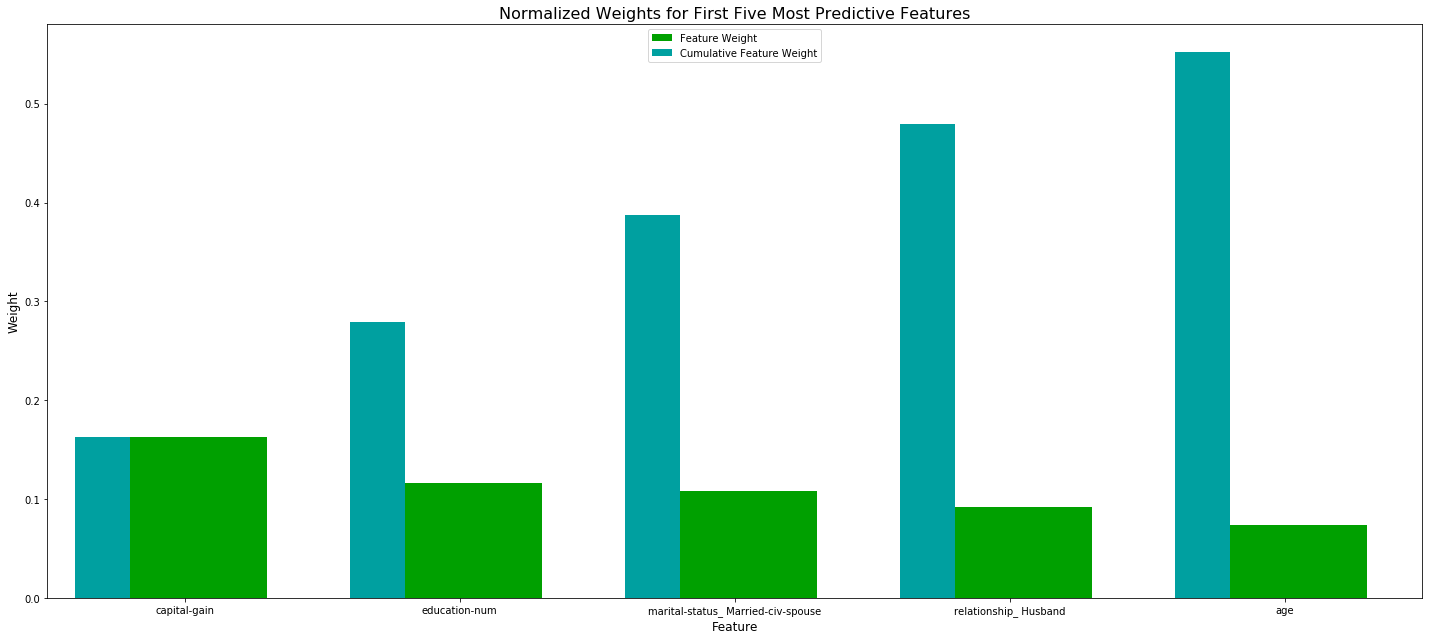

In [13]:
import visuals as vs
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set 

clf = RandomForestClassifier(min_samples_split=8, n_estimators=20, criterion='gini',max_depth=10 )


model = clf.fit(X_train, y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot

vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**
The results show that marital status, capital gain, number of years of education, relationship and age are the most important features and had predominant factor for final prediction.
It was anticipated that  occupation, education, age, hours per week and marital status has the strongest impact of the salary so it affect mainly on the prediction. These factors were thouh base on ecomomicatl and theoretical premises. Perform in this project model invsteigetaion  shows that: 

-**Education, age, martial status** were ranked as estimated (according to preious assumption in question 6). It is a confirmation that in mature ecomical systems these factors play dominant role in individual income. There are based on the evolutionary phenomena of human being, where to understand more (better education), wider knowledge (age/experience) and individual status let him to live longer and better. Better economical and live status of individual secure better contribution in society development.
 
-**Occupation and hours per week** features were predicted wrongly. Wrongly predicted feeauters surprised. After revision it can be assumed that following factors can eventualy hava impact for misledin feature predictions. The data set comes from 1994 so it does not reflect nowadays “world economical” setup. The occupation was not so important to make more money. In 1994 more money could make individual who perform , for instance quiet simple but hard and dangerous job (like worker on offshore oil rigs). Hours per week feature can indicate on the fact wich was mentioned in question 6. There were more individuals who work not on regular basis (40hours/week) but as a entrepreneurs, as owners, free lancers, artists or others whos work cannot be counted or estimated but still earn more then 50k$.

-**Capital gain and realationship** were not taken into consideration but it was given for analysis of feutre importance. Capital gain can actualy give quiet good overview abut the status of indivial assets profits(invest incomes). The relationship includes sex and marital status (as it was assumed in question 6) which has considerable impact for final prediction.


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [14]:
# Import functionality for cloning a model
from sklearn.base import clone

# Train model on all features 
start = time.time()
clf.fit(X_train, y_train)
end = time.time()

all_features_time = end - start

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]


start = time.time() # Get start time
# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
end = time.time() # Get end time

reduced_features_time = end - start

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

#print full_time, reduced_time  

# Report scores from the final model using both versions of data
print "***Final Model trained on full data***\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\n***Final Model trained on reduced data***\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))
print "\n***Time model performance***\n------"
print "Training for all features (complete data set):  {:.2f} [seconds].".format(all_features_time)
print "Training for reduced features (reduced data set):{:.2f} [seconds].".format(reduced_features_time)

***Final Model trained on full data***
------
Accuracy on testing data: 0.8541
F-score on testing data: 0.7237

***Final Model trained on reduced data***
------
Accuracy on testing data: 0.8457
F-score on testing data: 0.6943

***Time model performance***
------
Training for all features (complete data set):  0.39 [seconds].
Training for reduced features (reduced data set):0.19 [seconds].


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**
The accuracy (0.8457) and F-score (0.6943) on reduced data with only five features is slightly lower then test result achieved when the training is performed on full data set (with all features) (0.8541 and 0.7237 respectively). Time perforce analysis (which is the function of applied CPU) indicate nearly over 100%-time reduction when the training is performed on reduce data set. In this project, the time was not the critical issue but performing analysis on extremely huge data set can have dramatical impact on model performance (time) end reduce considerably research possibilities (less variants/hyperparameters can be verified). Besides, slightly lower accuracy I will prefer to train model on reduce data set.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.